In [12]:
!pip install accelerate --q
!pip install -U "transformers>=4.39.0" --q
!pip install peft bitsandbytes --q
!pip install -U "trl>=0.8.3" --q
! pip install peft

In [ ]:
! pip show transformers

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
from transformers import AutoTokenizer, AutoProcessor, TrainingArguments, LlavaForConditionalGeneration, BitsAndBytesConfig
from peft import LoraConfig


model_id = "bhalladitya/llva-1.5-7b-scicap"
model = LlavaForConditionalGeneration.from_pretrained(model_id,torch_dtype=torch.float16)
model.to(device) # to cuda 

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): lora.Linear(
                (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=1024, out_features=64, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=64, out_features=1024, bias=F

In [4]:
# model

In [4]:
LLAVA_CHAT_TEMPLATE = """A chat between a curious user and an artificial intelligence assistant. \
                        The assistant gives helpful, detailed, and polite answers to the user's questions. \
                        {% for message in messages %}{% if message['role'] == 'user' %}\
                        USER: {% else %}ASSISTANT: {% endif %}{% for item in message['content'] %}{% if item['type'] == 'text' %}{{ item['text'] }}{% elif item['type'] == 'image' %}<image>{% endif %}{% endfor %}\
                        {% if message['role'] == 'user' %} {% else %}{{eos_token}}{% endif %}{% endfor %}"""

In [6]:
from transformers import AutoProcessor , LlavaProcessor
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.chat_template = LLAVA_CHAT_TEMPLATE
processor = AutoProcessor.from_pretrained(model_id)
processor.tokenizer = tokenizer

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [13]:
## sample Image 
# import requests
# from PIL import Image
# prompt = "A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <image>\nWhat are these?\nASSISTANT:"
# image_file = "http://images.cocodataset.org/val2017/000000039769.jpg"
# raw_image = Image.open(requests.get(image_file, stream=True).raw)
# raw_image

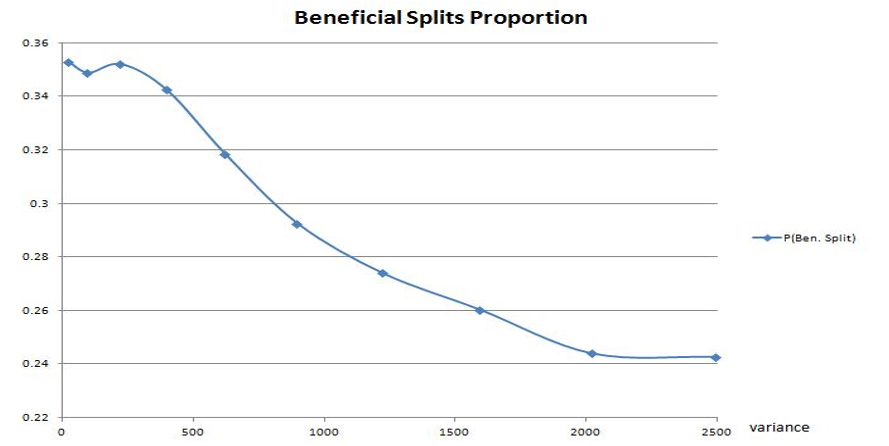

In [14]:
image_path = "test_images/1401.3869v1-Figure4-1.png"
raw_image = Image.open(image_path)
raw_image

In [17]:
prompt = "A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <image>\nProvide me a detailed scientific caption for this image?\nASSISTANT:"

In [18]:
inputs = processor(prompt, raw_image, return_tensors='pt').to(0, torch.float16)
output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER:  
Provide me a detailed scientific caption for this image?
ASSISTANT: The image displays a graph showing the relationship between the number of beneficial splits proportion and time. The graph is a blue line that starts at zero and gradually increases as the time progresses. The line represents the beneficial splits proportion, which is a measure of the proportion of beneficial mutations in a population over time. The graph provides a visual representation of the evolutionary dynamics of a population, illustrating how the proportion of beneficial mutations changes over time.
